{'bonas': 'bonas', 'gcn': 'gcn', 'nao': 'nao', 'seminas': 'seminas', 'xgb': 'xgb', 'ngb': 'ngb', 'lgb': 'lgb', 'bayes_lin_reg': 'bayes_lin_reg', 'rf': 'rf', 'var_sparse_gp': 'var_sparse_gp', 'bohamiann': 'bohamiann', 'gp': 'gp', 'sparse_gp': 'sparse_gp', 'bananas': 'bananas', 'dngo': 'dngo', 'mlp': 'mlp', 'graph_features': 'ZCP + GRAF RF', 'graph_features_xgb': 'ZCP + GRAF XGB', 'graph_features_tune': 'ZCP + GRAF RF', 'graph_features_xgb_tune': 'ZCP + GRAF XGB tune', 'graph_features_xgb_params': 'ZCP + GRAF XGB+'}


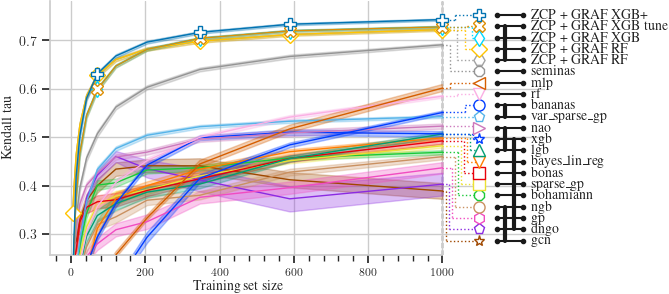

In [21]:
import pandas as pd
from zc_combine.utils.plot_utils import make_plot

def read_data(paths):
    dfs = [pd.read_csv(p) for p in paths]
    df = pd.concat(dfs)
    df.reset_index(inplace=True)
    return df

df = read_data(['runs_nb101_ui.csv', 'runs_nb101_cluster.csv'])
df['benchmark']='nb101' #for nb101, different files use different benchmark name
make_plot(df, 'train_nb101.pdf')

In [17]:
run_count = 100

# check if nothing missing
(df.groupby(['benchmark', 'predictor', 'train_size']).count()['seed'] == run_count).all()
assert len(df['benchmark'].unique()) == 1 and len(df['dataset'].unique()) == 1

In [18]:
import numpy as np

def compute_time(include_fit=False):
    plot_time = df['train_time'] + df['fit_time'] if include_fit else df['train_time']
    div = 10 ** np.log10(plot_time).astype(int)
    return plot_time // div * div

df['train time'] = compute_time()
df['runtime'] = compute_time(include_fit=True)

In [19]:
df[['train time', 'train_time']]

,train time,train_time
0,10000.0,1.063473e+04
1,10000.0,1.472616e+04
2,20000.0,2.645908e+04
3,40000.0,4.427687e+04
4,80000.0,8.127602e+04
...,...,...
23095,200000.0,2.235899e+05
23096,300000.0,3.690017e+05
23097,600000.0,6.434937e+05
23098,1000000.0,1.091406e+06


C:\Users\marti\anaconda3\envs\results_proc\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marti\anaconda3\envs\results_proc\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


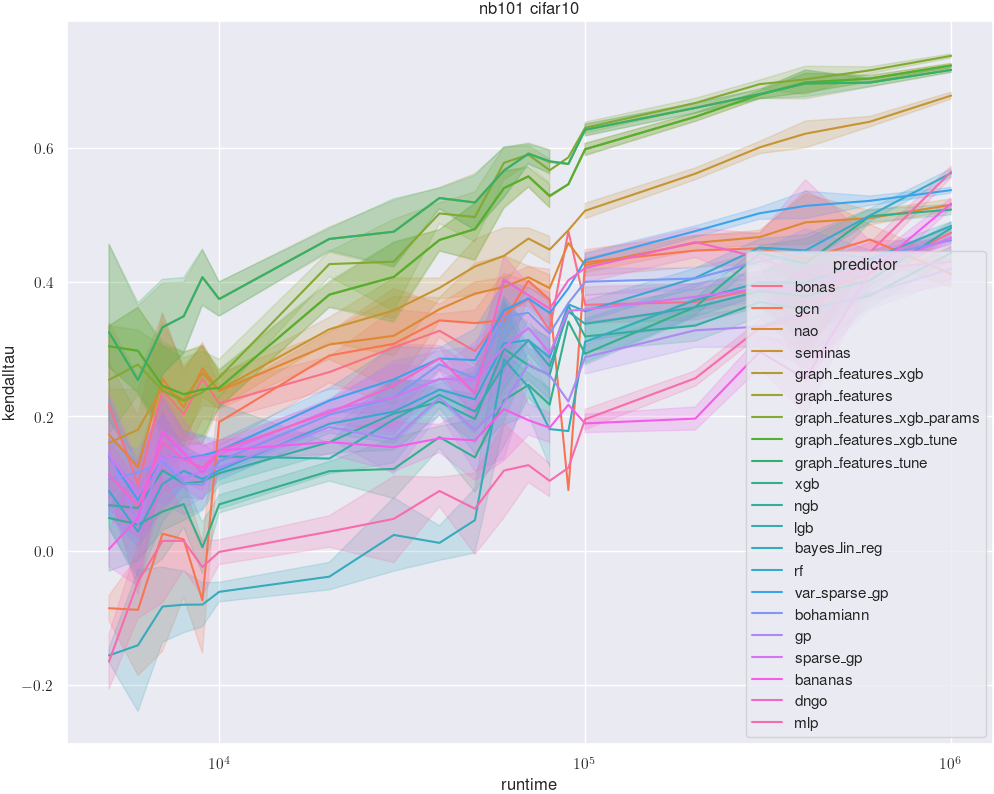

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(10,8))
sns.lineplot(data=df, x='runtime', y='kendalltau', hue='predictor')
plt.title(f"{df.iloc[0]['benchmark']} {df.iloc[0]['dataset']}")
plt.xscale('log')

plt.show()